<a href="https://colab.research.google.com/github/akshat122402/Credit_Risk_Analysis/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [258]:
# Read the dataset into a DataFrame
df = pd.read_csv('LoanStats_2019Q1_new.csv')
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint
0,20000,20000,20000,60 months,17.19%,499.10,C,C5,6 years,RENT,47000.0,Source Verified,Mar-19,Issued,debt_consolidation,14.02,0,Sep-06,1,50.0,NaN,15,0,10687,19.70%,53,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaN,0.00,Apr-19,Apr-19,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN
1,21225,21225,21225,60 months,14.74%,502.05,C,C2,10+ years,MORTGAGE,225000.0,Not Verified,Mar-19,Issued,credit_card,16.80,0,Sep-94,2,NaN,110.0,14,1,95868,87.70%,22,21225.00,21225.00,0.00,0.00,0.00,0.00,0.0,0,0,NaN,0.00,Apr-19,Apr-19,0,NaN,1,Individual,NaN,NaN,NaN,0,0,694793,1,5,2,4,3.0,113558,76.0,0,1,17353,84.0,109300,1,0,4,5,49628.0,12635.0,76.4,0,0,126.0,294,24,3,4,30.0,NaN,1.0,NaN,0,4,6,4,4,11,7,7,6,14,0.0,0,0,2,100.0,50.0,1,0,747075,209426,53500,128175,NaN
2,5000,5000,5000,36 months,17.97%,180.69,D,D1,NaN,MORTGAGE,62000.0,Not Verified,Mar-19,Issued,home_improvement,19.82,1,Nov-87,0,4.0,NaN,8,0,7285,77.50%,18,5000.00,5000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaN,0.00,Apr-19,Apr-19,0,4.0,1,Individual,NaN,NaN,NaN,0,0,206639,0,1,0,0,33.0,24330,NaN,1,3,2318,78.0,9400,0,0,0,3,25830.0,2115.0,77.5,0,0,187.0,376,9,9,2,9.0,NaN,NaN,4.0,3,6,6,6,6,7,6,9,6,8,0.0,0,1,1,66.7,50.0,0,0,255738,31615,9400,39938,NaN
3,20000,20000,20000,36 months,8.19%,628.49,A,A4,1 year,MORTGAGE,200000.0,Not Verified,Mar-19,Issued,credit_card,22.66,1,Oct-01,0,18.0,NaN,20,0,20984,32.10%,49,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaN,0.00,Apr-19,Apr-19,0,48.0,1,Individual,NaN,NaN,NaN,0,0,326678,2,5,1,3,4.0,63760,61.0,2,3,5097,50.0,64400,1,5,0,6,17194.0,30437.0,38.4,0,0,162.0,209,2,2,1,2.0,18.0,21.0,18.0,1,7,9,9,15,20,14,27,9,20,0.0,0,0,3,95.7,22.2,0,0,448069,84744,49400,105180,NaN
4,12000,12000,12000,60 months,15.57%,289.09,C,C3,5 years,MORTGAGE,49000.0,Source Verified,Mar-19,Issued,debt_consolidation,13.47,0,Apr-93,0,38.0,NaN,18,0,17672,48.20%,36,12000.00,12000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaN,0.00,Apr-19,Apr-19,0,38.0,1,Individual,NaN,NaN,NaN,0,0,143079,2,4,0,0,51.0,88353,128.0,4,6,3587,100.0,36700,0,8,1,6,7949.0,14848.0,39.1,1,0,144.0,311,3,3,5,3.0,38.0,11.0,38.0,4,5,10,7,11,12,12,19,10,18,0.0,0,0,4,86.1,14.3,0,0,189260,106025,24400,68860,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [259]:
# Generate basic descriptive statistics for the DataFrame
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint
count,115675.000000,115675.000000,115675.000000,115675.000000,1.156750e+05,115418.000000,115675.000000,115675.000000,49876.000000,13423.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.00000,115675.0,115675.0,115675.000000,115675.000000,24998.000000,115675.0,1.668100e+04,16681.000000,115675.0,115675.000000,1.156750e+05,115675.000000,115675.000000,115675.000000,115675.000000,112158.000000,1.156750e+05,98356.000000,115675.000000,115675.000000,115675.000000,115651.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115668.000000,114352.000000,114297.000000,115675.000000,115675.000000,112158.000000,115675.000000,115675.000000,115675.000000,115675.000000,114417.000000,22598.000000,101318.000000,32896.00000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,112529.0,115675.0,115675.000000,115675.000000,115675.000000,114346.000000,115675.000000,115675.0,1.156750e+05,1.156750e+05,115675.000000,1.156750e+05,16681.000000
mean,16671.263021,16671.263021,16668.039550,481.087484,8.505333e+04,20.445427,0.227595,0.443069,36.654864,87.794830,11.723544,0.117484,17859.725835,23.121262,15850.569647,15847.558901,1071.595223,1071.339422,817.105946,254.455866,0.03344,0.0,0.0,684.854139,0.016693,46.419034,1.0,1.393034e+05,19.539382,0.0,176.482818,1.530888e+05,0.913776,2.790430,0.701145,1.586721,20.143360,3.763173e+04,67.932236,1.167806,2.463384,6395.217324,54.217058,41527.288360,1.119118,1.545710,1.877994,4.316672,14307.482752,16306.032531,49.817880,0.007469,3.038591,125.115747,176.763761,15.652777,8.732648,1.378561,26.151743,39.701080,7.663525,37.31706,0.436395,3.741967,5.544664,5.020324,7.205749,8.475159,8.301630,13.071761,5.501388,11.705909,0.0,0.0,0.058007,1.992349,94.919273,32.611930,0.117441,0.0,1.971531e+05,5.585600e+04,29185.391589,4.871611e+04,39336.440801
std,10352.132790,10352.132790,10354.689225,290.654019,1.098949e+05,20.480562,0.746965,0.736914,21.806311,21.745046,5.977082,0.327165,22735.701183,12.177136,10267.420835,10269.652197,2615.226965,2615.079475,2567.618274,278.023875,1.08115,0.0,0.0,2433.597857,0.140971,21.887349,0.0,8.027360e+04,8.099141,0.0,1776.351801,1.718055e+05,1.127978,2.912667,0.934572,1.554939,24.583029,4.796880e+04,23.492706,1.436514,2.447904,5920.727685,20.367860,37737.346245,1.488827,2.729418,2.309489,3.154960,17725.923722,20214.367192,28.543757,0.095435,327.162309,56.721665,100.724495,19.253788,9.397910,1.720424,34.075895,22.369914,6.089147,22.12795,1.341723,2.482458,3.507135,3.263597,4.548438,7.413471,4.983926,7.922110,3.450848,5.974131,0

In [260]:
# Iterate through columns and their data types
for column, dtype in df.dtypes.items():
    print(f"{column}: {dtype}")

loan_amnt: int64
funded_amnt: int64
funded_amnt_inv: int64
term: object
int_rate: object
installment: float64
grade: object
sub_grade: object
emp_length: object
home_ownership: object
annual_inc: float64
verification_status: object
issue_d: object
loan_status: object
purpose: object
dti: float64
delinq_2yrs: int64
earliest_cr_line: object
inq_last_6mths: int64
mths_since_last_delinq: float64
mths_since_last_record: float64
open_acc: int64
pub_rec: int64
revol_bal: int64
revol_util: object
total_acc: int64
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: int64
collection_recovery_fee: int64
last_pymnt_d: object
last_pymnt_amnt: float64
next_pymnt_d: object
last_credit_pull_d: object
collections_12_mths_ex_med: int64
mths_since_last_major_derog: float64
policy_code: int64
application_type: object
annual_inc_joint: float64
dti_joint: float64
verification_status_jo

In [261]:
# Print columns with missing data exceeding 50%
missing_percentages = df.isnull().sum() * 100 / len(df)

for column, missing_percentage in missing_percentages.items():
    if missing_percentage > 50:
      print(f"{column}: {missing_percentage:.2f}%")

mths_since_last_delinq: 56.88%
mths_since_last_record: 88.40%
mths_since_last_major_derog: 78.39%
annual_inc_joint: 85.58%
dti_joint: 85.58%
verification_status_joint: 87.36%
mths_since_recent_bc_dlq: 80.46%
mths_since_recent_revol_delinq: 71.56%
revol_bal_joint: 85.58%


In [262]:
# Drop columns with high missing data
df = df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record',
                      'mths_since_last_major_derog', 'mths_since_recent_bc_dlq',
                      'mths_since_recent_revol_delinq', 'verification_status_joint',
                      'annual_inc_joint', 'dti_joint', 'revol_bal_joint'])

In [263]:
# Clean and convert columns to appropriate data types
df['term'] = df['term'].str.replace(' months', '').astype(int)
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [264]:
# Define a mapping for 'emp_length'
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length'] = df['emp_length'].map(emp_length_mapping)

In [265]:
# Convert date columns to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [266]:
# Filter rows with 'application_type' not equal to 'Joint App'
df = df[df['application_type'] != 'Joint App']

In [267]:
# Drop 'application_type' column
df = df.drop(columns=['application_type'])

In [268]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,20000,20000,20000,60,17.19,499.10,C,C5,6.0,RENT,47000.0,Source Verified,2019-03-01,Issued,debt_consolidation,14.02,0,2006-09-01,1,15,0,10687,19.7,53,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaT,0.00,2019-04-01,2019-04-01,0,1,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,3.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524
1,21225,21225,21225,60,14.74,502.05,C,C2,10.0,MORTGAGE,225000.0,Not Verified,2019-03-01,Issued,credit_card,16.80,0,1994-09-01,2,14,1,95868,87.7,22,21225.00,21225.00,0.00,0.00,0.00,0.00,0.0,0,0,NaT,0.00,2019-04-01,2019-04-01,0,1,0,0,694793,1,5,2,4,3.0,113558,76.0,0,1,17353,84.0,109300,1,0,4,5,49628.0,12635.0,76.4,0,0,126.0,294,24,3,4,30.0,1.0,0,4,6,4,4,11,7,7,6,14,0.0,0,0,2,100.0,50.0,1,0,747075,209426,53500,128175
2,5000,5000,5000,36,17.97,180.69,D,D1,NaN,MORTGAGE,62000.0,Not Verified,2019-03-01,Issued,home_improvement,19.82,1,1987-11-01,0,8,0,7285,77.5,18,5000.00,5000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaT,0.00,2019-04-01,2019-04-01,0,1,0,0,206639,0,1,0,0,33.0,24330,NaN,1,3,2318,78.0,9400,0,0,0,3,25830.0,2115.0,77.5,0,0,187.0,376,9,9,2,9.0,NaN,3,6,6,6,6,7,6,9,6,8,0.0,0,1,1,66.7,50.0,0,0,255738,31615,9400,39938
3,20000,20000,20000,36,8.19,628.49,A,A4,1.0,MORTGAGE,200000.0,Not Verified,2019-03-01,Issued,credit_card,22.66,1,2001-10-01,0,20,0,20984,32.1,49,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaT,0.00,2019-04-01,2019-04-01,0,1,0,0,326678,2,5,1,3,4.0,63760,61.0,2,3,5097,50.0,64400,1,5,0,6,17194.0,30437.0,38.4,0,0,162.0,209,2,2,1,2.0,21.0,1,7,9,9,15,20,14,27,9,20,0.0,0,0,3,95.7,22.2,0,0,448069,84744,49400,105180
4,12000,12000,12000,60,15.57,289.09,C,C3,5.0,MORTGAGE,49000.0,Source Verified,2019-03-01,Issued,debt_consolidation,13.47,0,1993-04-01,0,18,0,17672,48.2,36,12000.00,12000.00,0.00,0.00,0.00,0.00,0.0,0,0,NaT,0.00,2019-04-01,2019-04-01,0,1,0,0,143079,2,4,0,0,51.0,88353,128.0,4,6,3587,100.0,36700,0,8,1,6,7949.0,14848.0,39.1,1,0,144.0,311,3,3,5,3.0,11.0,4,5,10,7,11,12,12,19,10,18,0.0,0,0,4,86.1,14.3,0,0,189260,106025,24400,68860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,5000,5000,5000,36,13.56,169.83,C,C1,NaN,MORTGAGE,48000.0,Not Verified,2019-01-01,Current,home_improvement,8.28,2,2006-05-01,0,8,0,3846,13.6,21,4656.15,4656.15,501.96,501.96,343.85,158.11,0.0,0,0,2019-04-01,169.83,2019-05-01,2019-04-01,0,1,0,0,35666,0,1,0,0

In [269]:
# Select columns with data type 'object'
df.select_dtypes(include=['object'])

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose
0,C,C5,RENT,Source Verified,Issued,debt_consolidation
1,C,C2,MORTGAGE,Not Verified,Issued,credit_card
2,D,D1,MORTGAGE,Not Verified,Issued,home_improvement
3,A,A4,MORTGAGE,Not Verified,Issued,credit_card
4,C,C3,MORTGAGE,Source Verified,Issued,debt_consolidation
...,...,...,...,...,...,...
115670,C,C1,MORTGAGE,Not Verified,Current,home_improvement
115671,A,A1,MORTGAGE,Not Verified,Current,debt_consolidation
115672,C,C4,MORTGAGE,Source Verified,Current,debt_consolidation
115673,B,B3,MORTGAGE,Verified,Current,debt_consolidation


In [270]:
df.describe(include='all')

<ipython-input-270-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-270-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-270-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-270-174ba9bf1a5c>:1: FutureWarning: Treating date

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994,98994,90246.000000,98994,9.899400e+04,98994,98994,98994,98994,98994.000000,98994.000000,98994,98994.000000,98994.000000,98994.000000,98994.000000,98896.00000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.0,98994.0,83202,98994.000000,97064,98992,98994.000000,98994.0,98994.0,98994.000000,9.899400e+04,98994.000000,98994.000000,98994.000000,98994.000000,95990.000000,9.899400e+04,84397.000000,98994.000000,98994.000000,98994.000000,98972.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98988.000000,98047.000000,98000.000000,98994.000000,98994.000000,95990.000000,98994.000000,98994.000000,98994.000000,98994.000000,98098.000000,86956.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,98994.000000,95848.0,98994.0,98994.000000,98994.000000,98994.000000,98041.000000,98994.000000,98994.0,9.899400e+04,9.899400e+04,98994.000000,9.899400e+04
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,33,NaN,4,NaN,3,3,7,12,NaN,NaN,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,A,A4,NaN,MORTGAGE,NaN,Not Verified,2019-01-01 00:00:00,Current,debt_consolidation,NaN,NaN,2006-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-01 00:00:00,NaN,2019-05-01 00:00:00,2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,32618,9940,NaN,46943,NaN,48333,37835,80791,54316,NaN,NaN,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53430,NaN,50891,96549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,1969-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,2019-04-01 00:00:00,2018-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

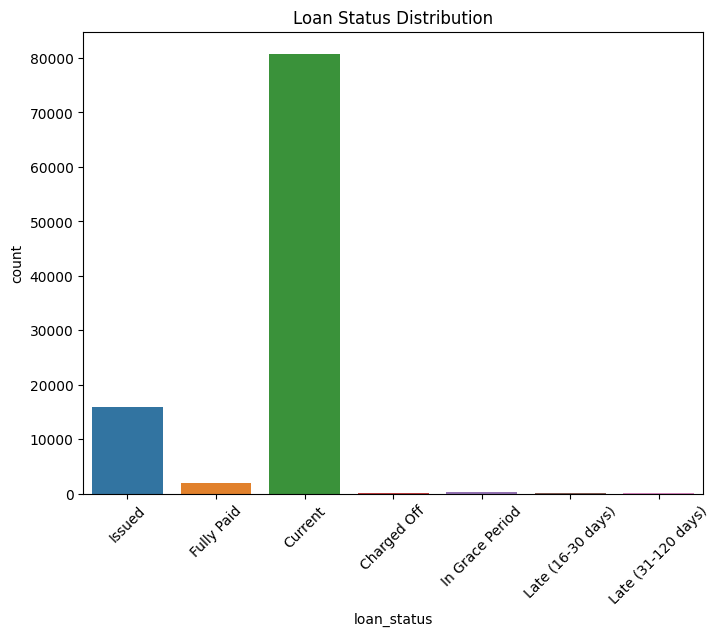

In [271]:
# Plot a countplot for 'loan_status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xticks(rotation=45)
plt.show()

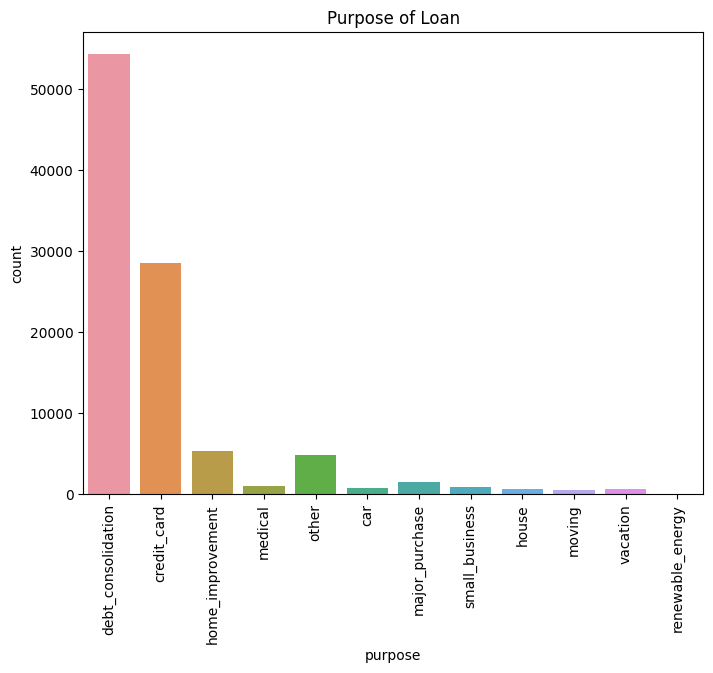

In [272]:
# Plot a countplot for 'purpose' column
plt.figure(figsize=(8, 6))
sns.countplot(x='purpose', data=df)
plt.title("Purpose of Loan")
plt.xticks(rotation=90)
plt.show()

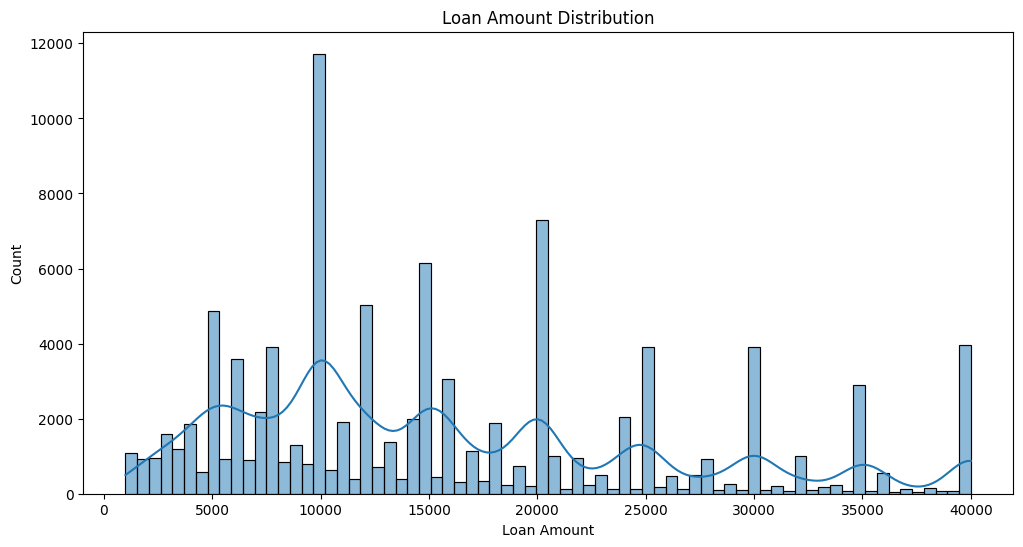

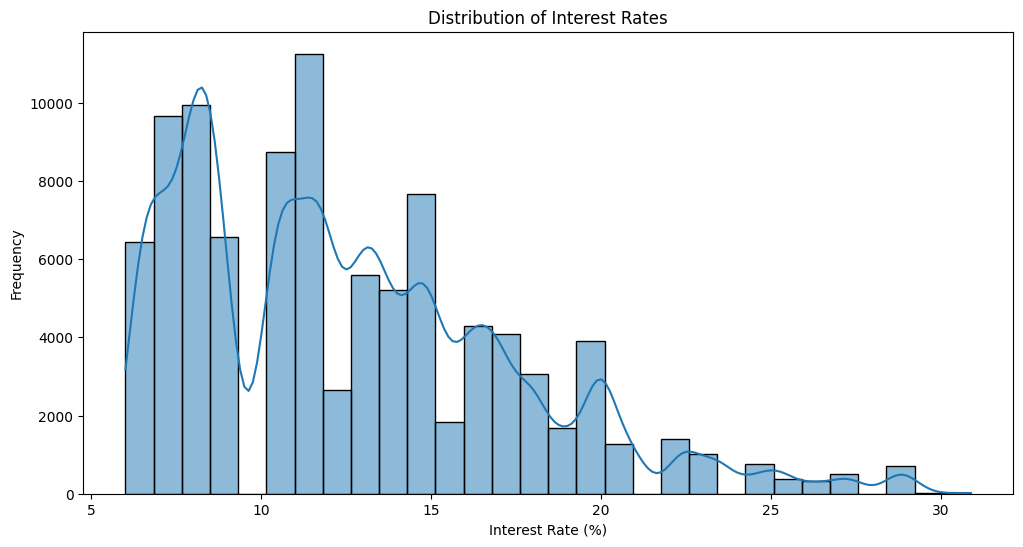

In [273]:
# Plot a histogram for 'loan_amnt' column
plt.figure(figsize=(12, 6))
sns.histplot(df['loan_amnt'], kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

# Plot a histogram for 'int_rate' column
plt.figure(figsize=(12, 6))
sns.histplot(df['int_rate'], bins=30, kde=True)
plt.title("Distribution of Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-274-2bb3ed4ecca3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


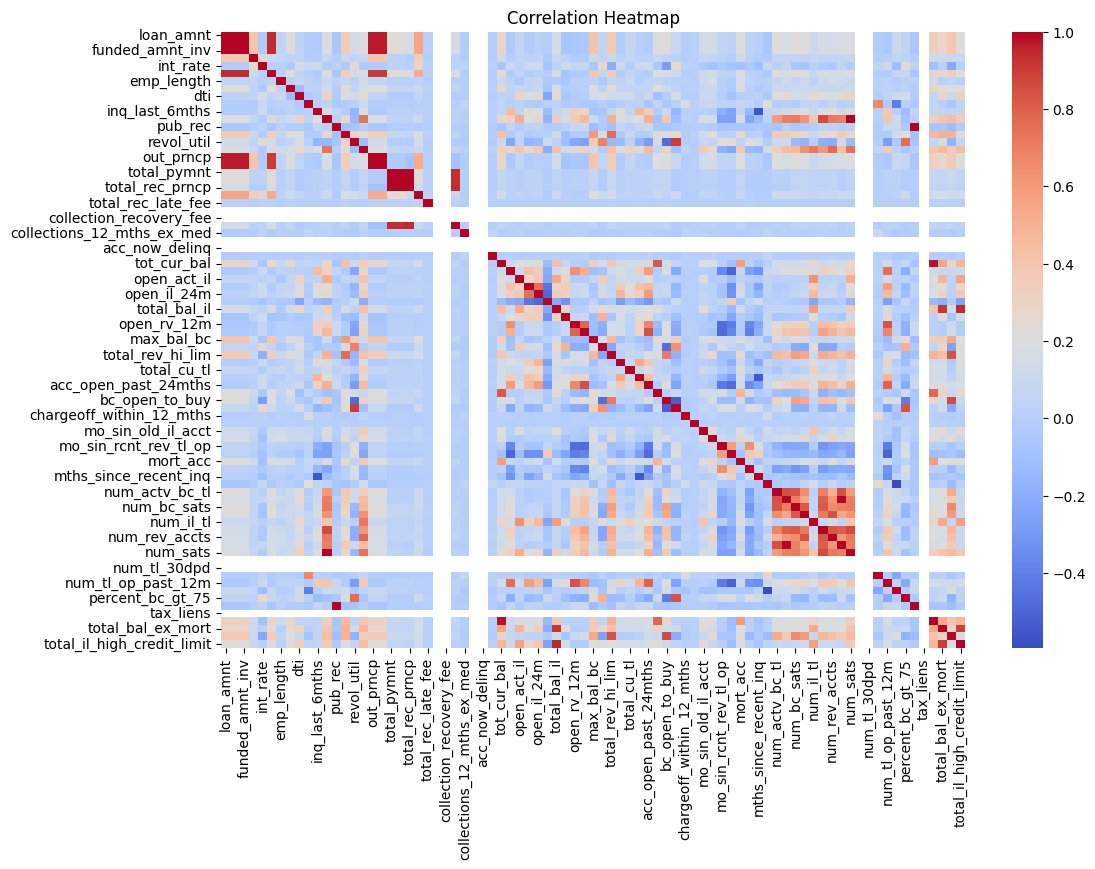

In [274]:
# Plot a heatmap of the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [275]:
df['loan_status'].unique()

array(['Issued', 'Fully Paid', 'Current', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      dtype=object)

In [276]:
df['loan_status'].value_counts()

Current               80791
Issued                15821
Fully Paid             1889
In Grace Period         200
Late (16-30 days)       130
Late (31-120 days)      122
Charged Off              41
Name: loan_status, dtype: int64

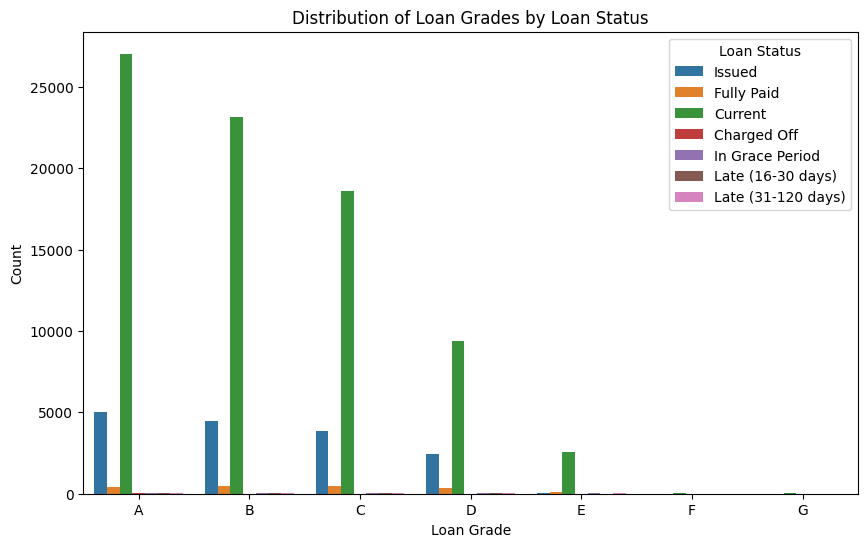

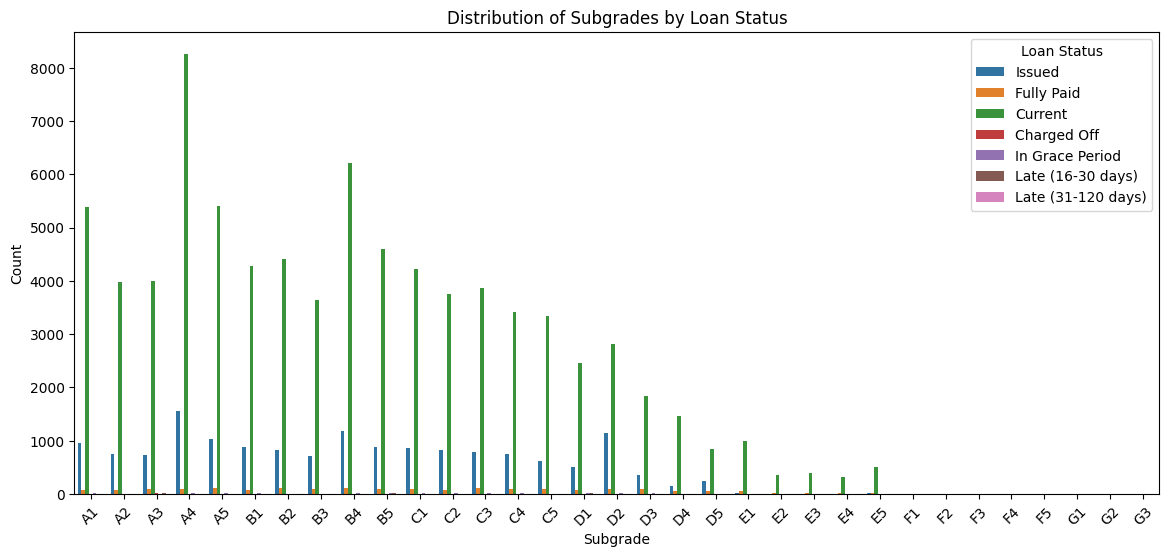

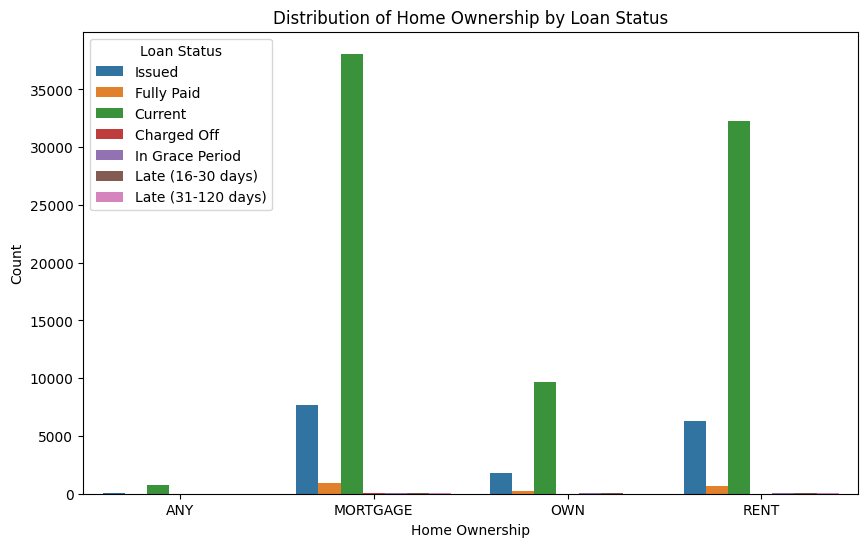

In [277]:
# Plot a countplot for 'grade' by 'loan_status'
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=df, order=sorted(df['grade'].unique()))
plt.title("Distribution of Loan Grades by Loan Status")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Plot a countplot for 'sub_grade' by 'loan_status'
plt.figure(figsize=(14, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=df, order=sorted(df['sub_grade'].unique()))
plt.title("Distribution of Subgrades by Loan Status")
plt.xlabel("Subgrade")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=45)
plt.show()

# Plot a countplot for 'home_ownership' by 'loan_status'
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df, order=sorted(df['home_ownership'].unique()))
plt.title("Distribution of Home Ownership by Loan Status")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

In [278]:
# Create a DataFrame of loan defaults based on selected loan status categories
loan_status_categories = ['Charged Off', 'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period']
loan_defaults = df[df['loan_status'].isin(loan_status_categories)]

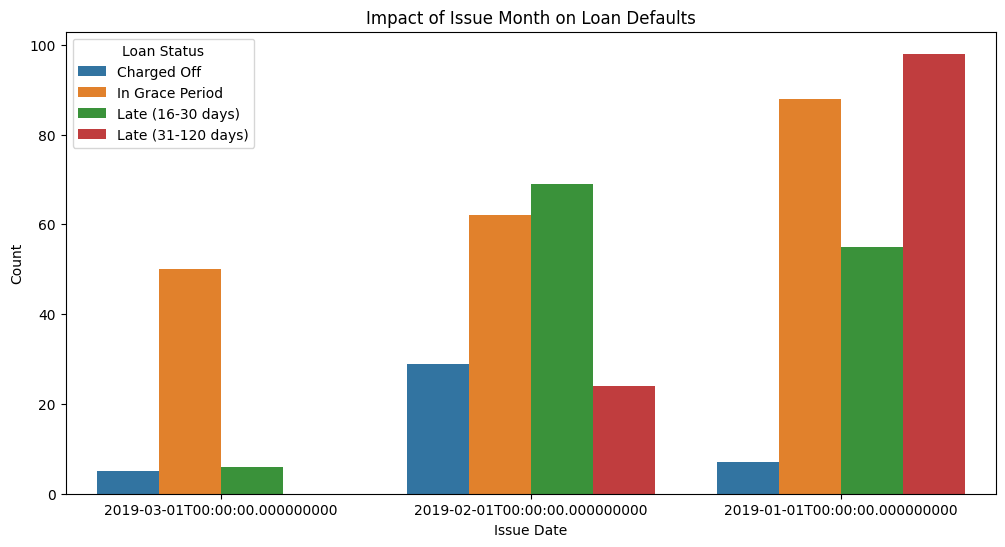

In [279]:
# Plot the impact of issue month on loan defaults
plt.figure(figsize=(12, 6))
sns.countplot(x='issue_d', data=loan_defaults, hue='loan_status')
plt.title("Impact of Issue Month on Loan Defaults")
plt.xlabel("Issue Date")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

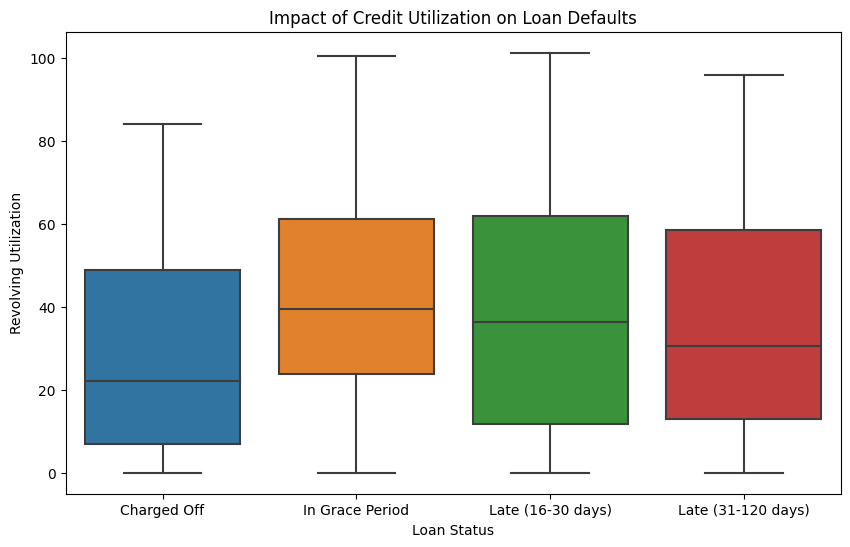

In [280]:
# Plot a boxplot of credit utilization by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_defaults)
plt.title("Impact of Credit Utilization on Loan Defaults")
plt.xlabel("Loan Status")
plt.ylabel("Revolving Utilization")
plt.show()

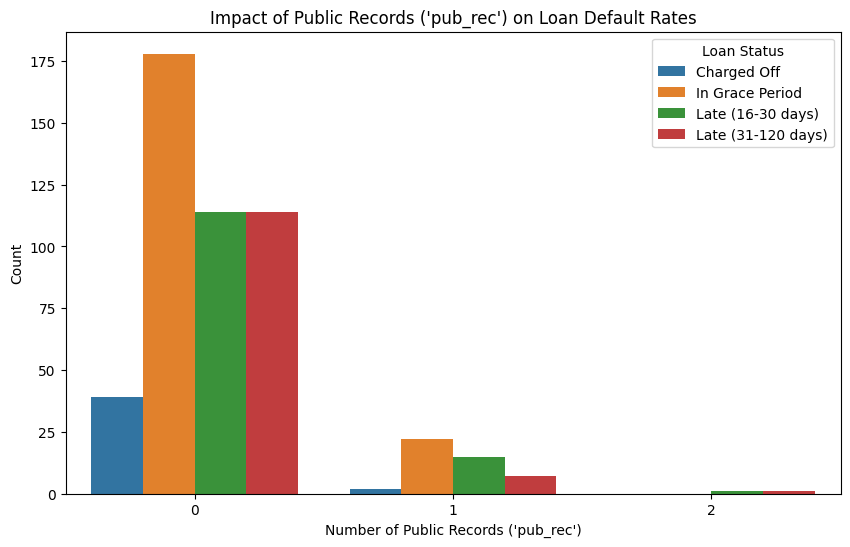

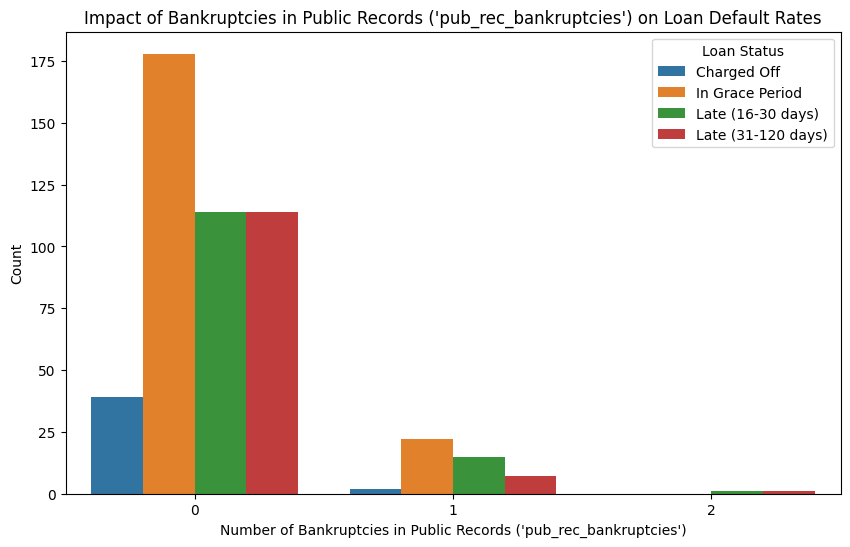

Summary Statistics for 'pub_rec':

Summary Statistics for 'pub_rec_bankruptcies':


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,41.0,0.048780,0.218085,0.0,0.0,0.0,0.0,1.0
Current,80791.0,0.118800,0.329244,0.0,0.0,0.0,0.0,4.0
Fully Paid,1889.0,0.123875,0.335894,0.0,0.0,0.0,0.0,2.0
In Grace Period,200.0,0.110000,0.313675,0.0,0.0,0.0,0.0,1.0
Issued,15821.0,0.116996,0.325918,0.0,0.0,0.0,0.0,4.0
Late (16-30 days),130.0,0.130769,0.360630,0.0,0.0,0.0,0.0,2.0
Late (31-120 days),122.0,0.073770,0.292270,0.0,0.0,0.0,0.0,2.0


In [281]:
# Plot a countplot of 'pub_rec' by loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec', hue='loan_status', data=loan_defaults)
plt.title("Impact of Public Records ('pub_rec') on Loan Default Rates")
plt.xlabel("Number of Public Records ('pub_rec')")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()

# Plot a countplot of 'pub_rec_bankruptcies' by loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=loan_defaults)
plt.title("Impact of Bankruptcies in Public Records ('pub_rec_bankruptcies') on Loan Default Rates")
plt.xlabel("Number of Bankruptcies in Public Records ('pub_rec_bankruptcies')")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()

summary_pub_rec = df.groupby('loan_status')['pub_rec'].describe()
summary_pub_rec_bankruptcies = df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

print("Summary Statistics for 'pub_rec':")
summary_pub_rec

print("\nSummary Statistics for 'pub_rec_bankruptcies':")
summary_pub_rec_bankruptcies

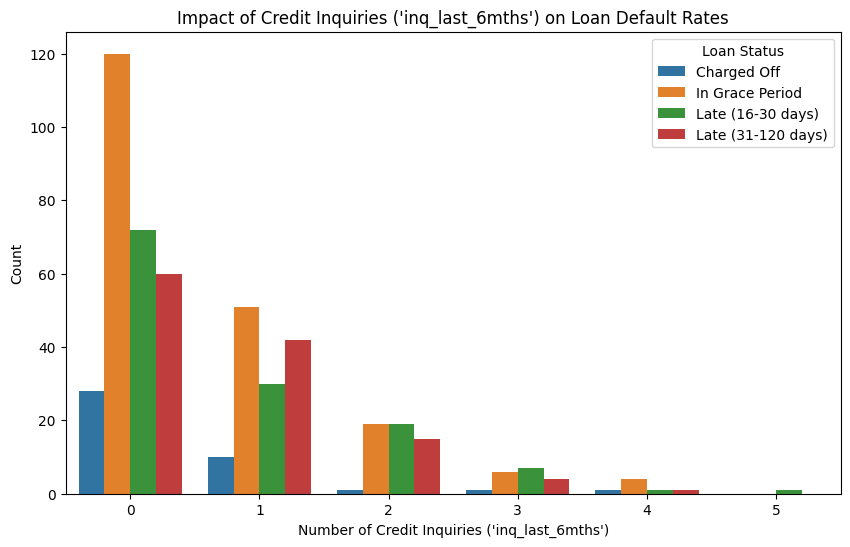

Summary Statistics for 'inq_last_6mths':


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,41.0,0.463415,0.868837,0.0,0.0,0.0,1.0,4.0
Current,80791.0,0.452018,0.742164,0.0,0.0,0.0,1.0,5.0
Fully Paid,1889.0,0.595024,0.850969,0.0,0.0,0.0,1.0,5.0
In Grace Period,200.0,0.615000,0.922513,0.0,0.0,0.0,1.0,4.0
Issued,15821.0,0.456861,0.749454,0.0,0.0,0.0,1.0,5.0
Late (16-30 days),130.0,0.753846,1.027238,0.0,0.0,0.0,1.0,5.0
Late (31-120 days),122.0,0.721311,0.864949,0.0,0.0,1.0,1.0,4.0


In [282]:
# Plot a countplot of 'inq_last_6mths' by loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='inq_last_6mths', hue='loan_status', data=loan_defaults)
plt.title("Impact of Credit Inquiries ('inq_last_6mths') on Loan Default Rates")
plt.xlabel("Number of Credit Inquiries ('inq_last_6mths')")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()

summary_inquiries = df.groupby('loan_status')['inq_last_6mths'].describe()

print("Summary Statistics for 'inq_last_6mths':")
summary_inquiries

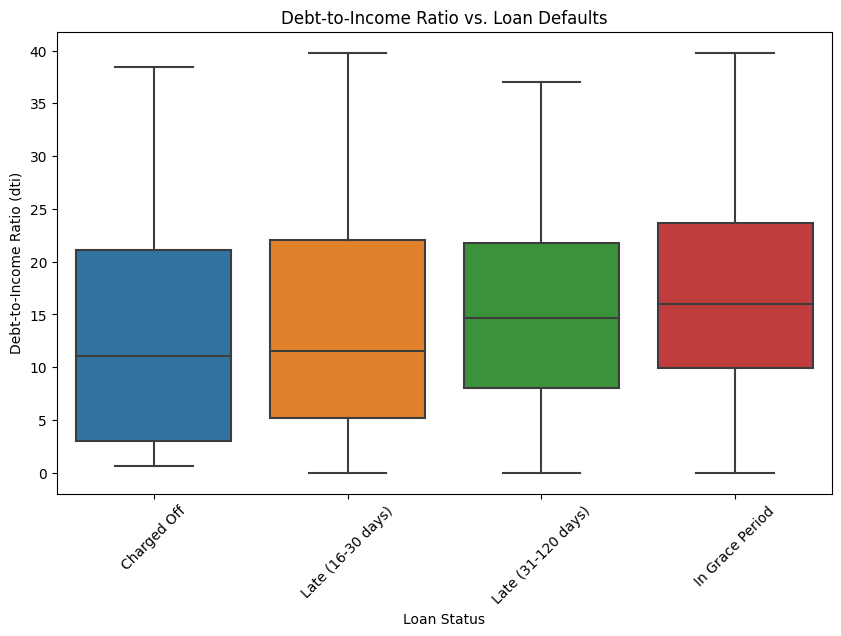

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,41.0,13.584634,11.079987,0.67,2.9700,11.060,21.0800,38.43
In Grace Period,200.0,16.904750,9.187613,0.00,9.9125,15.945,23.6875,39.80
Late (16-30 days),130.0,13.962308,10.174214,0.00,5.2225,11.520,22.0225,39.75
Late (31-120 days),122.0,14.902623,9.210011,0.00,8.0625,14.675,21.7675,37.00


In [283]:
# Plot a boxplot of debt-to-income ratio by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_defaults, order=loan_status_categories)
plt.title("Debt-to-Income Ratio vs. Loan Defaults")
plt.xlabel("Loan Status")
plt.ylabel("Debt-to-Income Ratio (dti)")
plt.xticks(rotation=45)
plt.show()

summary_stats = loan_defaults.groupby('loan_status')['dti'].describe()
summary_stats